# Students ID

Student Name - Inês Honrado<br>
Student id - 20240559<br>
Contact e-mail - 20240559@novaims.unl.pt<br>

Student Name - Jude Gbenimako<br>
Student id - 20240700<br>
Contact e-mail - 20240700@novaims.unl.pt<br>

Student Name - Rúben Marques<br>
Student id - 20240352<br>
Contact e-mail - 20240352@novaims.unl.pt<br>

Student Name - Susana Reis<br>
Student id - 20240567<br>
Contact e-mail - 20240567@novaims.unl.pt<br>

Student Name - Tomás Carvalho<br>
Student id - 20240938<br>
Contact e-mail - 20240938@novaims.unl.pt<br>

# Import the Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import f1_score
import time
from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

# Context

Workers' compensation for workplace injuries in New York are administrated through the Workers' Compensation Board. Due to the fact that over 5 million claims have been processed since the year 2000, assessing claims manually is very time-consuming. The purpose of this project is to apply machine learning models, taking claims from 2020 to 2022, to conduct automated claim evaluations in order to seep up decision-making on new claims and increase WCB efficiency in handling compensation processes.

# Metadata

- **Accident Date**: Injury date of the claim.
- **Age at Injury**: Age of injured worker when the injury occurred.
- **Alternative Dispute Resolution**: Adjudication processes external to the Board.
- **Assembly Date**: The date the claim was first assembled.
- **Attorney/Representative**: Whether the claim is being represented by an attorney.
- **Average Weekly Wage**: The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.
- **Birth Year**: The reported year of birth of the injured worker.
- **C-2 Date**: Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- **C-3 Date**: Date Form C-3 (Employee Claim Form) was received.
- **Carrier Name**: Name of the primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- **Carrier Type**: Type of primary insurance provider responsible for providing workers’ compensation coverage.
- **Claim Identifier**: Unique identifier for each claim, assigned by WCB.
- **County of Injury**: Name of the New York County where the injury occurred.
- **COVID-19 Indicator**: Indicates if the claim may be associated with COVID-19.
- **District Name**: Name of the WCB district office that oversees claims for that region or area of the state.
- **First Hearing Date**: Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing.
- **Gender**: The reported gender of the injured worker.
- **IME-4 Count**: Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination."
- **Industry Code**: NAICS code and descriptions are available at [NAICS Search](https://www.naics.com/search-naics-codes-by-industry/).
- **Industry Code Description**: 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- **Medical Fee Region**: Approximate region where the injured worker would receive medical services.
- **OIICS Nature of Injury Description**: The OIICS nature of injury codes & descriptions are available at [BLS OIICS Manual](https://www.bls.gov/iif/oiics_manual_2007.pdf).
- **WCIO Cause of Injury Code**: The WCIO cause of injury codes & descriptions are available at [WCIO Cause Table](https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf).
- **WCIO Cause of Injury Description**: See description of field above.
- **WCIO Nature of Injury Code**: The WCIO nature of injury codes & descriptions are available at [WCIO Nature Table](https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf).
- **WCIO Nature of Injury Description**: See description of field above.
- **WCIO Part of Body Code**: The WCIO part of body codes & descriptions are available at [WCIO Part Table](https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf).
- **WCIO Part of Body Description**: See description of field above.
- **Zip Code**: The reported ZIP code of the injured worker’s home address.
- **Agreement Reached**: Binary variable: Yes if there is an agreement without the involvement of the WCB (unknown at the start of a claim).
- **WCB Decision**: Multiclass variable: Decision of the WCB relative to the claim: "Accident" means that the claim refers to a workplace accident; "Occupational Disease" means illness from the workplace; requires WCB deliberation, so it is unknown at the start of a claim.
- **Claim Injury Type**: Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

# Import the data

In [11]:
X_train_preprocessed = pd.read_csv('X_train_preprocessed.csv')
X_val_preprocessed = pd.read_csv('X_val_preprocessed.csv')
df_test_preprocessed = pd.read_csv('df_test_preprocessed.csv')

X_train_enc_scal = pd.read_csv('X_train_enc_scal.csv')
X_val_enc_scal = pd.read_csv('X_val_enc_scal.csv')
df_test_enc_scal = pd.read_csv('df_test_enc_scal.csv')

y_train_enc = pd.read_csv('y_train_enc.csv')
y_val_enc = pd.read_csv('y_val_enc.csv')

# Model Assessment and Selection

## Feature Selection

Since we are trying to build a model to predict future claims, no date variables will be kept, as those values are specific to the train claims.

In [15]:
columns_to_remove = ['Accident_ymd', 'Assembly_ymd', 'C2_ymd']

X_train_enc_scal.drop(columns=columns_to_remove, inplace=True)
X_val_enc_scal.drop(columns=columns_to_remove, inplace=True)

In [16]:
categorical_variables = [
    'Carrier Name', 'Carrier Type', 'County of Injury', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'District Name', 
    'Gender', 'Medical Fee Region', 'Zip Code', 'Injury Day of Week'
]

numerical_variables = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Age at Injury', 'Birth Year', 'IME-4 Count',
    'Agreement Reached', 'Number of Dependents', 
    'C-3 Received', 'First Hearing Happened', 'COVID-19 Indicator', 
    'Time to Assembly', 'Time to C-2', 
    'Multiple Form Submissions', 'Above County Wage Average',
    'Average Weekly Wage', 'Wage/Dependents Ratio'
]

### Spearman Correlations

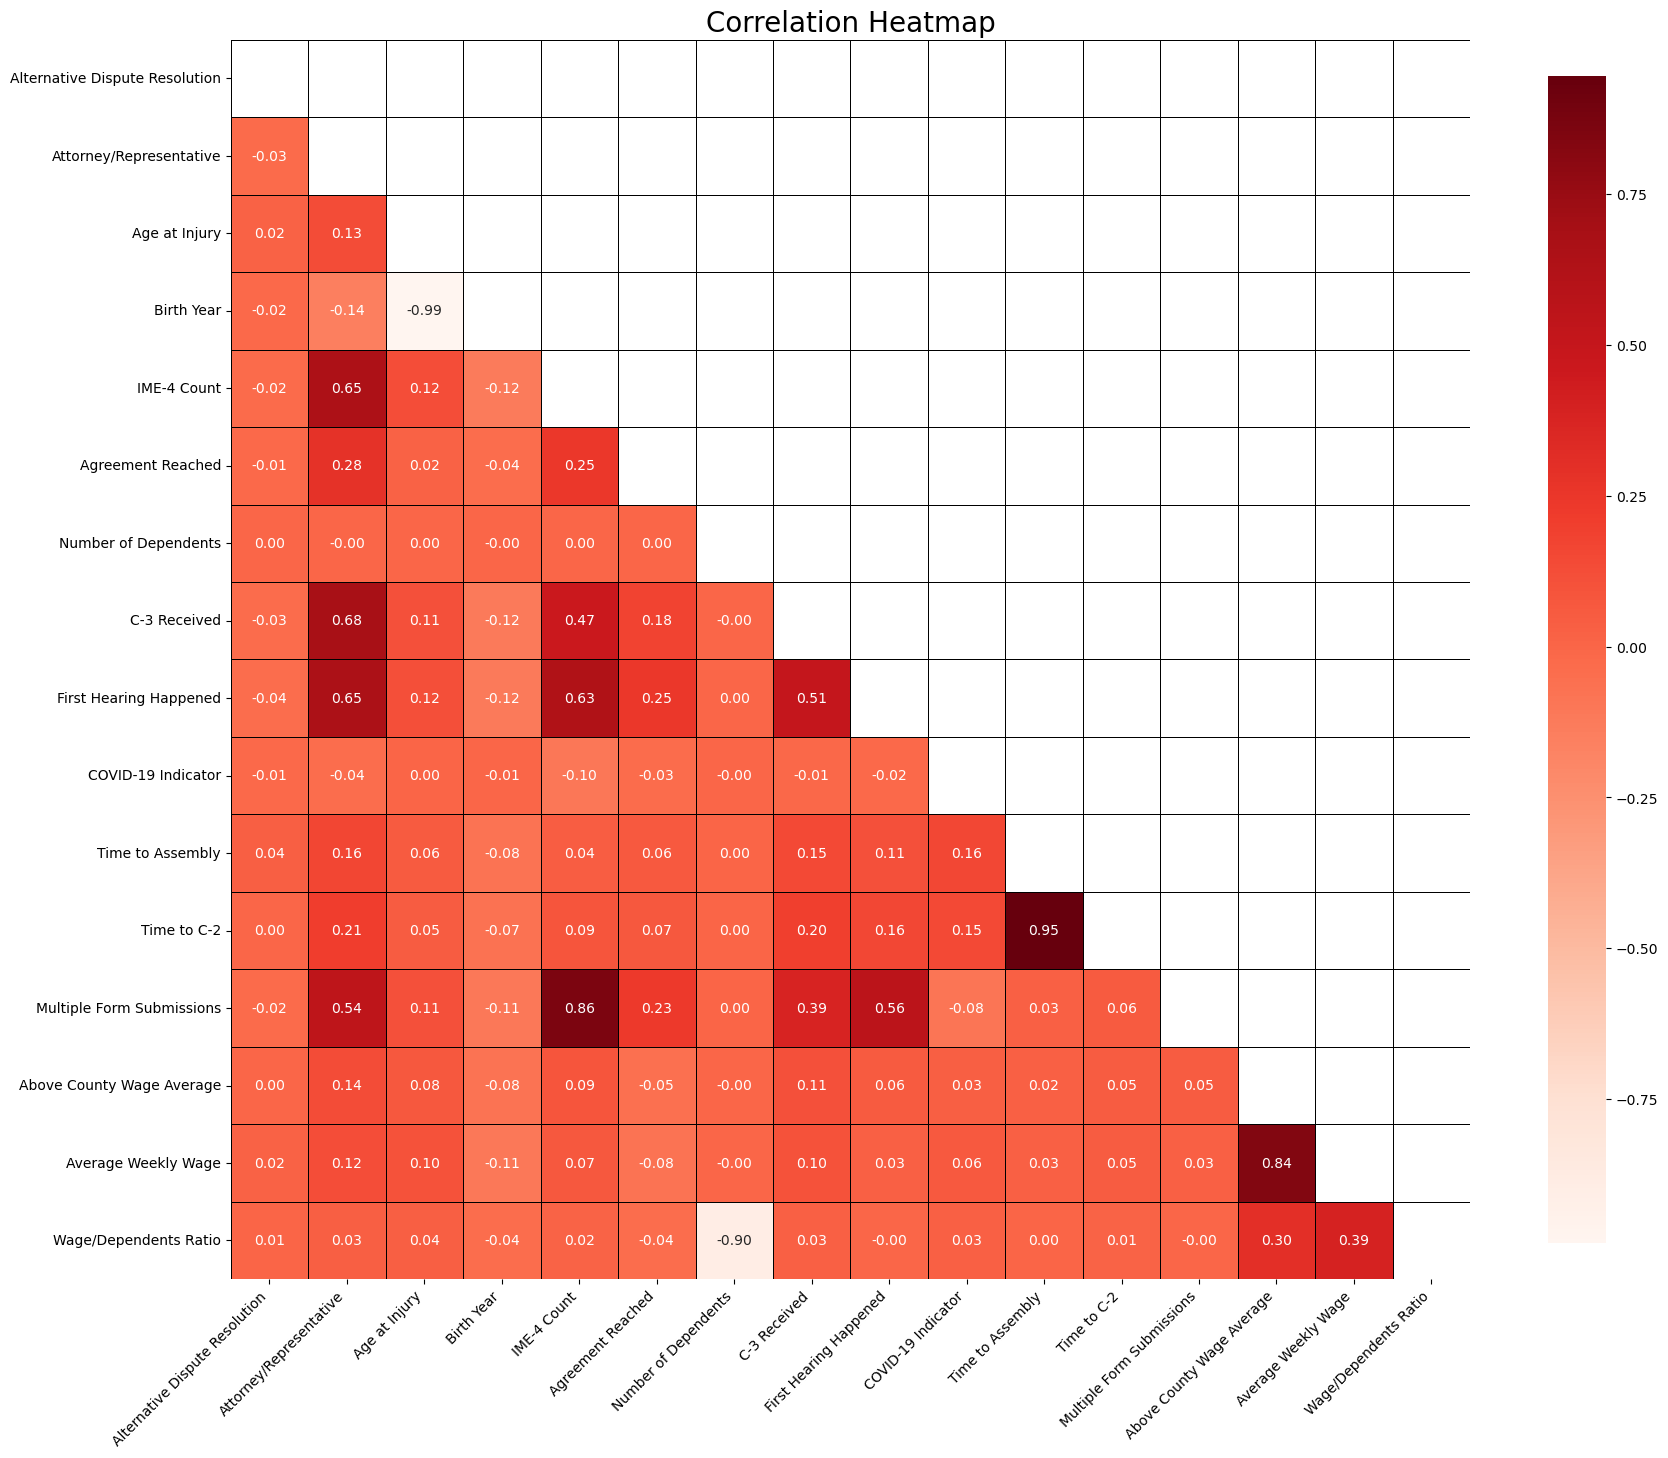

In [18]:
def cor_heatmap(cor, title='Correlation Heatmap', cmap='Reds'):
    mask = np.triu(np.ones_like(cor, dtype=bool))

    plt.figure(figsize=(18, 16))
    sns.heatmap(data=cor, annot=True, cmap=cmap, fmt='.2f', 
                 mask=mask, linewidths=0.5, linecolor='black', square=True,
                 cbar_kws={"shrink": .8}, annot_kws={"size": 10})  # Adjust annotation size here
    
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

cor_spearman = X_train_enc_scal[numerical_variables].corr(method='spearman')
cor_heatmap(cor_spearman)

High correlations:
- Birth Year and Age at Injury
- Average Weekly Wage and Above County Wage Average
- IME-4 Count and Multiple Form Submissions
- Number of Dependents and Wage/Dependents Ratio
- Time to Assembly and Time to C-2

### RandomForestClassifier Feature Importance

In [21]:
model = RandomForestClassifier(n_estimators=50, max_depth=9, min_samples_split=50, max_features=None, class_weight='balanced', random_state=15)
model.fit(X_train_enc_scal, y_train_enc)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_enc_scal.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                           Feature  Importance
21          First Hearing Happened    0.153915
11                     IME-4 Count    0.132692
16          WCIO Part Of Body Code    0.113467
20                    C-3 Received    0.094899
23                Time to Assembly    0.084264
15      WCIO Nature of Injury Code    0.048757
3              Average Weekly Wage    0.047724
2          Attorney/Representative    0.040311
14       WCIO Cause of Injury Code    0.038868
24                     Time to C-2    0.037529
5                     Carrier Name    0.029157
18               Agreement Reached    0.026107
4                       Birth Year    0.021665
0                    Age at Injury    0.019908
25           Wage/Dependents Ratio    0.018338
17                        Zip Code    0.016236
12                   Industry Code    0.014540
22              Injury Day of Week    0.012298
7                 County of Injury    0.008973
13              Medical Fee Region    0.008863
8            

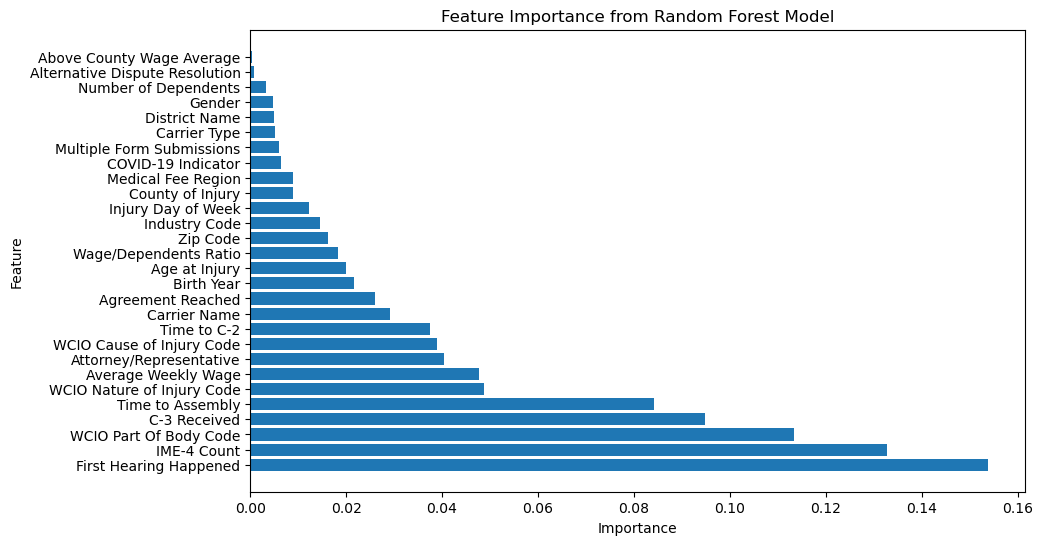

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We will set a threshold where any feature with importance greater than 2% is considered relevant, as half of the features achieve that value.

### Mutual Information

In [30]:
mi_scores = mutual_info_classif(X_train_enc_scal, y_train_enc)

mi_df = pd.DataFrame({'Feature': X_train_enc_scal.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Mutual Information Scores:\n", mi_df)

Mutual Information Scores:
                            Feature  MI Score
0              Average Weekly Wage  0.438132
1            Wage/Dependents Ratio  0.414712
2          Attorney/Representative  0.210055
3                      IME-4 Count  0.206982
4           First Hearing Happened  0.159922
5        Multiple Form Submissions  0.133451
6                     C-3 Received  0.120947
7                     Carrier Name  0.081799
8       WCIO Nature of Injury Code  0.074983
9           WCIO Part Of Body Code  0.073126
10               Agreement Reached  0.064415
11       WCIO Cause of Injury Code  0.061563
12                   Industry Code  0.037777
13                        Zip Code  0.031636
14       Above County Wage Average  0.030526
15                    Carrier Type  0.030049
16                          Gender  0.025786
17              Medical Fee Region  0.021989
18                   District Name  0.020028
19                Time to Assembly  0.019804
20                     Time

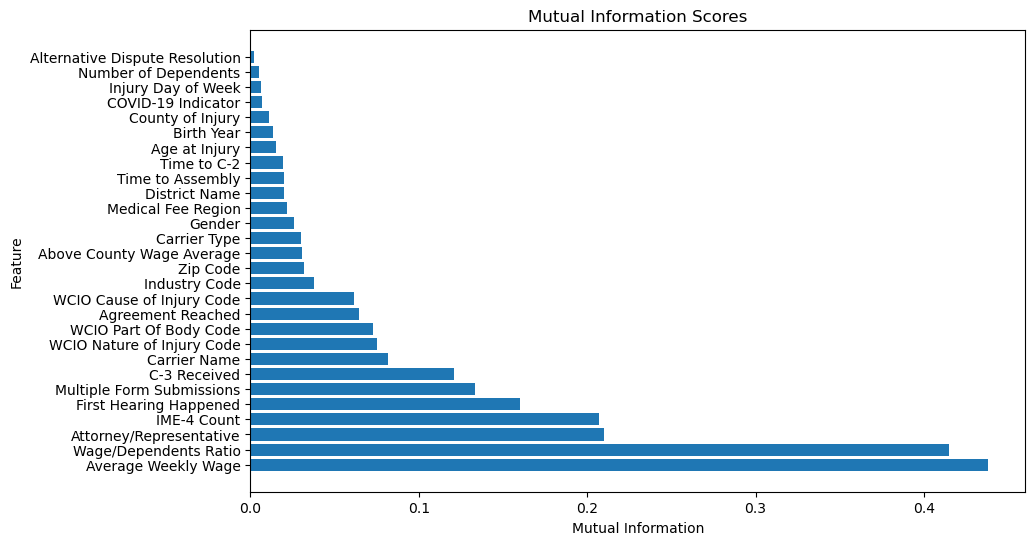

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

Here, we will mantain the 2% threshold.

### Lasso Regression

In [26]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [27]:
reg = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5)

In [28]:
reg.fit(X_train_enc_scal, y_train_enc)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5)

In [29]:
coef = pd.Series(reg.coef_, index=X_train_enc_scal.columns)
coef

Age at Injury                     0.478178
Alternative Dispute Resolution   -0.180078
Attorney/Representative           0.670549
Average Weekly Wage               0.222697
Birth Year                        0.458730
Carrier Name                      0.807708
Carrier Type                      0.187581
County of Injury                 -0.045485
COVID-19 Indicator                0.102398
District Name                    -0.129343
Gender                            0.112710
IME-4 Count                       0.383140
Industry Code                    -0.039856
Medical Fee Region               -0.173705
WCIO Cause of Injury Code         0.091270
WCIO Nature of Injury Code        0.682852
WCIO Part Of Body Code            0.229271
Zip Code                          0.818896
Agreement Reached                 0.274537
Number of Dependents             -0.000000
C-3 Received                      0.103197
First Hearing Happened            0.390628
Injury Day of Week                0.081627
Time to Ass

In [30]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 2 variables


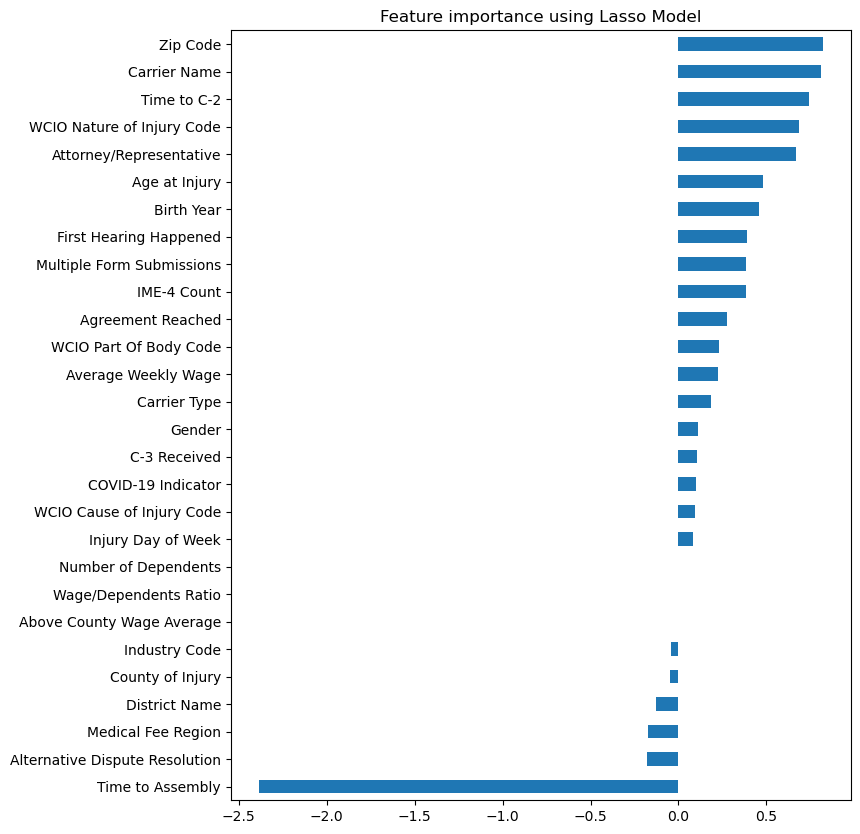

In [31]:
plot_importance(coef,'Lasso')

## Conclusions

Applying a voting system, and taking into account the 2% threshold for RandomForestClassifier Feature Importances and for Mutual Information, we get to the following conclusions:

| Predictor | Spearman  | RandomForestClassifier Feature Importance | Mutual Information | LASSO Regression | What to do? (One possible way to "solve") |
|---|---|---|---|---|---|
| Age at Injury | High correlated with Birth Year | Discard | Discard | Keep | Discard |
| Alternative Dispute Resolution | Keep | Discard | Discard | Keep | Discard |
| Attorney/Representative | Keep? | Keep | Keep | Keep | Include in the model |
| Average Weekly Wage | High correlated with Above County Wage Average | Keep | Keep | Keep | Include in the model |
| Birth Year | High correlated with Birth Year | Keep | Discard | Keep | Include in the model |
| Carrier Name | NA | Keep | Keep | Keep | Include in the model |
| Carrier Type | NA | Discard | Keep | Keep | Include in the model |
| County of Injury | NA | Discard | Discard | Keep | Discard |
| COVID-19 Indicator | Keep | Discard | Discard | Keep | Discard |
| District Name | NA | Discard | Discard | Keep | Discard |
| Gender | NA | Discard | Keep | Keep | Discard |
| IME-4 Count | High correlated with Multiple Form Submissions | Keep | Keep | Keep | Include in the model |
| Industry Code | NA | Discard | Keep | Keep | Include in the model |
| Medical Fee Region | NA | Discard | Keep | Keep | Include in the model |
| WCIO Cause of Injury Code | NA | Keep | Keep | Keep | Include in the model |
| WCIO Nature of Injury Code | NA | Keep | Keep | Keep | Include in the model |
| WCIO Part Of Body Code | NA | Keep | Keep | Keep | Include in the model |
| Zip Code | NA | Discard | Keep | Keep | Include in the model |
| Agreement Reached | Keep | Keep | Keep | Keep | Include in the model |
| Number of Dependents | High correlated with Wage/Dependents Ratio | Discard | Discard | Discard | Discard |
| C-3 Received | Keep | Keep | Keep | Keep | Include in the model |
| First Hearing Happened | Keep | Keep | Keep | Keep | Include in the model |
| Injury Day of Week | NA | Discard | Discard | Keep | Discard |
| Time to Assembly | High correlated with Time to C-2 | Keep | Keep | Keep | Include in the model |
| Time to C-2 | High correlated with Time to Assembly | Keep | Discard | Keep | Discard (already kept Time to Assembly) |
| Wage/Dependents Ratio | High correlated with Number of Dependents| Discard | Keep | Discard | Discard |
| Multiple Form Submissions | High correlated with IME-4 Count | Discard | Keep | Keep | Discard (already kept IME-4 Count) |
| Above County Wage Average | High correlated with Average Weekly Wage | Discard | Keep | Keep | Discard (already kept Average Weekly Wage) |

In [35]:
include_variables = [
    'Attorney/Representative',
    'Average Weekly Wage',
    'Birth Year',
    'Carrier Name',
    'Carrier Type',
    'IME-4 Count',
    'Industry Code',
    'Medical Fee Region',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code',
    'Zip Code',
    'Agreement Reached',
    'C-3 Received',
    'First Hearing Happened',
    'Time to Assembly'
]

## Model Comparison and Selection

We opted to use the holdout method for our model validation for practical reasons. Given the large size of our dataset, the holdout method was well-suited as it efficiently splits the data into training and validation sets without the additional computational complexity associated with cross-validation. We acknowledge that cross-validation can provide more robust insights by using multiple train-test splits, but its increased computational demands made the holdout method a more feasible choice in our context.

We will use F1 Weighted as our evaluation metric because it balances precision and recall while reflecting the actual class distribution and avoiding over-representing minor classes that may have limited impact on the overall system performance. This ensures a more accurate and fair assessment of the model's performance across all target classes, especially in imbalanced datasets like ours.

In [39]:
X_train = X_train_enc_scal[include_variables]

In [40]:
X_val = X_val_enc_scal[include_variables]

### RandomForestClassifier

In [42]:
def validation_rf(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(
        n_estimators=50, 
        max_depth=9, 
        min_samples_split=50, 
        max_features=None, 
        random_state=15
    )
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    y_val_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [43]:
results_rf = validation_rf(X_train, y_train_enc, X_val, y_val_enc)

In [44]:
results_rf

{'train_f1': 0.6674701872358457,
 'val_f1': 0.6671133995119831,
 'elapsed_time': 101.54730701446533}

### DecisionTreeClassifier

In [46]:
def validation_dt(X_train, y_train, X_val, y_val):
    model = DecisionTreeClassifier(
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [47]:
results_dt = validation_dt(X_train, y_train_enc, X_val, y_val_enc)

In [48]:
results_dt

{'train_f1': 0.6665497694777982,
 'val_f1': 0.6663370636964919,
 'elapsed_time': 2.3783786296844482}

### HistGradientBoostingClassifier

In [50]:
def validation_hgb(X_train, y_train, X_val, y_val):
    model = HistGradientBoostingClassifier(
        max_iter=2000, 
        max_depth=10, 
        random_state=15
    )
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [51]:
results_hgb = validation_hgb(X_train, y_train_enc, X_val, y_val_enc)

In [52]:
results_hgb

{'train_f1': 0.7032433797842116,
 'val_f1': 0.702365674400777,
 'elapsed_time': 6.780705213546753}

### MLPClassifier

In [54]:
def validation_mlp(X_train, y_train, X_val, y_val):
    model = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
        activation='relu',
        learning_rate_init=0.0025,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        tol=1e-6
    )
    
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [55]:
results_mlp = validation_mlp(X_train, y_train_enc, X_val, y_val_enc)

In [56]:
results_mlp

{'train_f1': 0.7063929244391414,
 'val_f1': 0.7055916198968502,
 'elapsed_time': 425.39242219924927}

### AdaBoostClassifier

In [58]:
def validation_ab(X_train, y_train, X_val, y_val):

    base_model = DecisionTreeClassifier(
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )
    
    model = AdaBoostClassifier(
        estimator=base_model, 
        n_estimators=50, 
        random_state=15
    )
    
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [59]:
results_ab = validation_ab(X_train, y_train_enc, X_val, y_val_enc)

In [60]:
results_ab

{'train_f1': 0.5950932185896447,
 'val_f1': 0.5826878820703909,
 'elapsed_time': 145.25092267990112}

### Voting Classifier

In [62]:
def validation_vc(X_train, y_train, X_val, y_val):

    rf_model = RandomForestClassifier(
        n_estimators=50, 
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )

    dt_model = DecisionTreeClassifier(
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )

    hgb_model = HistGradientBoostingClassifier(
        max_iter=2000, 
        max_depth=10, 
        random_state=15
    )

    mlp_model = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
        activation='relu',
        learning_rate_init=0.0025,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        tol=1e-6
    )
    
    model = VotingClassifier(
        estimators=[
            ('rf', rf_model),
            ('dt', dt_model),
            ('hgb', hgb_model),
            ('mlp', mlp_model)
        ],
        voting='soft'  
    )
    
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [63]:
results_vc = validation_vc(X_train, y_train_enc, X_val, y_val_enc)

In [64]:
results_vc

{'train_f1': 0.6866287277008896,
 'val_f1': 0.6862422397491185,
 'elapsed_time': 483.1489384174347}

### Stacking Classifier

In [66]:
def validation_stack(X_train, y_train, X_val, y_val):
    rf_model = RandomForestClassifier(
        n_estimators=50, 
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )
    
    hgb_model = HistGradientBoostingClassifier(
        max_iter=2000, 
        max_depth=10, 
        random_state=15
    )
    
    estimators = [
        ('rf', rf_model),
        ('hgbc', hgb_model)
    ]
    
    final_estimator = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
        activation='relu',
        learning_rate_init=0.0025,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        tol=1e-6
    )
    
    model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )

    
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [67]:
results_stack = validation_stack(X_train, y_train_enc, X_val, y_val_enc)

In [68]:
results_stack

{'train_f1': 0.7177412970760793,
 'val_f1': 0.715404722373905,
 'elapsed_time': 448.83949065208435}

### Comparing Models

In [70]:
def create_summary_table(results_rf, results_dt, results_hgb, results_mlp, results_ab, results_vc, results_stack):
    results = []
    models = [
        ("Random Forest", results_rf),
        ("Decision Tree", results_dt),
        ("Hist Gradient Boosting", results_hgb),
        ("MLP Classifier", results_mlp),
        ("Ada Boost Classifier", results_ab),
        ("Voting Classifier", results_vc),
        ("Stacking Classifier", results_stack)
    ]

    for model_name, model_results in models:
        train_f1 = model_results['train_f1']
        val_f1 = model_results['val_f1']
        elapsed_time = model_results['elapsed_time']
        
        results.append({
            "Model": model_name,
            "Train F1 Score": train_f1,
            "Validation F1 Score": val_f1,
            "Time Taken (s)": elapsed_time
        })
    
    summary_table = pd.DataFrame(results)
    
    return summary_table

summary_table = create_summary_table(results_rf, results_dt, results_hgb, results_mlp, results_ab, results_vc, results_stack)
summary_table

,Model,Train F1 Score,Validation F1 Score,Time Taken (s)
0,Random Forest,0.667470,0.667113,101.547307
1,Decision Tree,0.666550,0.666337,2.378379
2,Hist Gradient Boosting,0.703243,0.702366,6.780705
3,MLP Classifier,0.706393,0.705592,425.392422
4,Ada Boost Classifier,0.595093,0.582688,145.250923
5,Voting Classifier,0.686629,0.686242,483.148938
6,Stacking Classifier,0.717741,0.715405,448.839491


From the results, the **Stacking Classifier** achieved the highest performance, outperforming other models in both training and validation F1 scores. 


In the next phase, we will focus on fine-tuning the Stacking Classifie.


## Model Optimization

Since Stacking combines multiple models, we will try to improve each individual model by optimizing their hyperparameters using GridSearchCV.

### RandomForestClassifier GridSearchCV

In [75]:
rf_model = RandomForestClassifier(
    min_samples_split=50, 
    random_state=15
)

param_grid = {
    'n_estimators': [40, 50, 60],   
    'max_depth': [9, 13, 15]         
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train_enc)

print("Best Parameters found: ", grid_search.best_params_)
print("Best Score found: ", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters found:  {'max_depth': 15, 'n_estimators': 60}
Best Score found:  0.7415628882636426


### HistGradientBoostingClassifier GridSearchCV

In [77]:
hgb_model = HistGradientBoostingClassifier(
    random_state=15
)

param_grid = {
    'max_depth': [9, 13, 15],         
    'max_iter': [500, 1000, 2000]     
}

grid_search_hgb = GridSearchCV(estimator=hgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search_hgb.fit(X_train, y_train_enc)

print("Best Parameters found: ", grid_search_hgb.best_params_)
print("Best Score found: ", grid_search_hgb.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters found:  {'max_depth': 15, 'max_iter': 500}
Best Score found:  0.748215418755848


### MLPClassifier GridSearchCV

In [79]:
mlp_model = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
    activation='relu',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-6
)

param_grid = {
    'learning_rate_init': [0.001, 0.0025]  
}

grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)

grid_search_mlp.fit(X_train, y_train_enc)

print("Best Parameters found: ", grid_search_mlp.best_params_)
print("Best Score found: ", grid_search_mlp.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters found:  {'learning_rate_init': 0.0025}
Best Score found:  0.7527051547672391


### Optimized StackingClassifier

In [81]:
def validation_stack_optimized(X_train, y_train, X_val, y_val):
    rf_model = RandomForestClassifier(
        n_estimators=60, 
        max_depth=15, 
        min_samples_split=50, 
        random_state=15
    )
    
    hgb_model = HistGradientBoostingClassifier(
        max_iter=500, 
        max_depth=15, 
        random_state=15
    )
    
    estimators = [
        ('rf', rf_model),
        ('hgbc', hgb_model)
    ]
    
    final_estimator = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
        activation='relu',
        learning_rate_init=0.0025,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        tol=1e-6
    )
    
    model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )

    
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    
    y_val_pred = model.predict(X_val)
    
    y_train_pred = model.predict(X_train)
    
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    return {
        'train_f1': train_f1,
        'val_f1': val_f1,
        'elapsed_time': elapsed_time
    }

In [82]:
results_stack_optimized = validation_stack_optimized(X_train, y_train_enc, X_val, y_val_enc)

In [83]:
results_stack_optimized

{'train_f1': 0.7373350005654559,
 'val_f1': 0.7255489223691114,
 'elapsed_time': 508.4395627975464}

Although the improvements were not substantial, the improved model still outperformed the previous models. 

## Final Model

In [86]:
rf_model = RandomForestClassifier(
    n_estimators=60, 
    max_depth=15, 
    min_samples_split=50, 
    random_state=15
)
    
hgb_model = HistGradientBoostingClassifier(
    max_iter=500, 
    max_depth=15, 
    random_state=15
)
    
estimators = [
    ('rf', rf_model),
    ('hgbc', hgb_model)
]
    
final_estimator = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
    activation='relu',
    learning_rate_init=0.0025,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-6
)
    
final_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
    )
    
final_model.fit(X_train, y_train_enc)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=15,
                                                       min_samples_split=50,
                                                       n_estimators=60,
                                                       random_state=15)),
                               ('hgbc',
                                HistGradientBoostingClassifier(max_depth=15,
                                                               max_iter=500,
                                                               random_state=15))],
                   final_estimator=MLPClassifier(early_stopping=True,
                                                 hidden_layer_sizes=(32, 32,
                                                                     32),
                                                 learning_rate_init=0.0025,
                                                 max_iter=1000,
                                                 n_iter_no_change=20,
                                                 random_state=42, tol=1e-06))

# Agreement Reached Model

The **df_test** dataset did not contain the column **'Agreement Reached'**, which was essential for our model. To address this, we decided to build a separate model to predict the **'Agreement Reached'** column based on the available features in the test dataset.

In [89]:
target_ar = 'Agreement Reached'
X_train_ar = X_train_preprocessed.drop(columns=[target_ar])
y_train_ar = X_train_preprocessed[target_ar]

X_val_ar = X_val_preprocessed.drop(columns=[target_ar])
y_val_ar = X_val_preprocessed[target_ar]

df_test_ar = df_test_preprocessed

In [90]:
y_train_ar = pd.Series(y_train_ar)
y_val_ar = pd.Series(y_val_ar)

In [91]:
y_train_ar.value_counts()

Agreement Reached
0    429832
1     20974
Name: count, dtype: int64

## Encoding

In [93]:
cols_to_enc = [
    'Carrier Name', 'Carrier Type', 'County of Injury', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'District Name', 
    'Gender', 'Medical Fee Region', 'Zip Code', 'Injury Day of Week'
] 

In [94]:
target_encoder = ce.TargetEncoder(cols=cols_to_enc)

X_train_ar[cols_to_enc] = target_encoder.fit_transform(X_train_ar[cols_to_enc], y_train_ar)
X_val_ar[cols_to_enc] = target_encoder.transform(X_val_ar[cols_to_enc])
df_test_ar[cols_to_enc] = target_encoder.transform(df_test_ar[cols_to_enc])

## Scaling

In [96]:
columns=X_train_ar.columns

In [97]:
scaler = MinMaxScaler()
X_train_ar = scaler.fit_transform(X_train_ar)

In [98]:
X_val_ar = scaler.transform(X_val_ar)
df_test_ar = scaler.transform(df_test_ar)

In [99]:
X_train_ar = pd.DataFrame(X_train_ar, columns=columns)
X_val_ar= pd.DataFrame(X_val_ar, columns=columns)
df_test_ar = pd.DataFrame(df_test_ar, columns=columns)

## Feature Selection

### Spearman Correlation

In [102]:
num_ar = [
    'Alternative Dispute Resolution', 'Attorney/Representative',
    'Age at Injury', 'Birth Year', 'IME-4 Count',
    'Number of Dependents', 'C-3 Received', 'First Hearing Happened', 
    'COVID-19 Indicator', 'Time to Assembly', 'Time to C-2', 
    'Multiple Form Submissions', 'Above County Wage Average',
    'Average Weekly Wage', 'Wage/Dependents Ratio',
    'Accident_ymd', 'Assembly_ymd', 'C2_ymd'
]

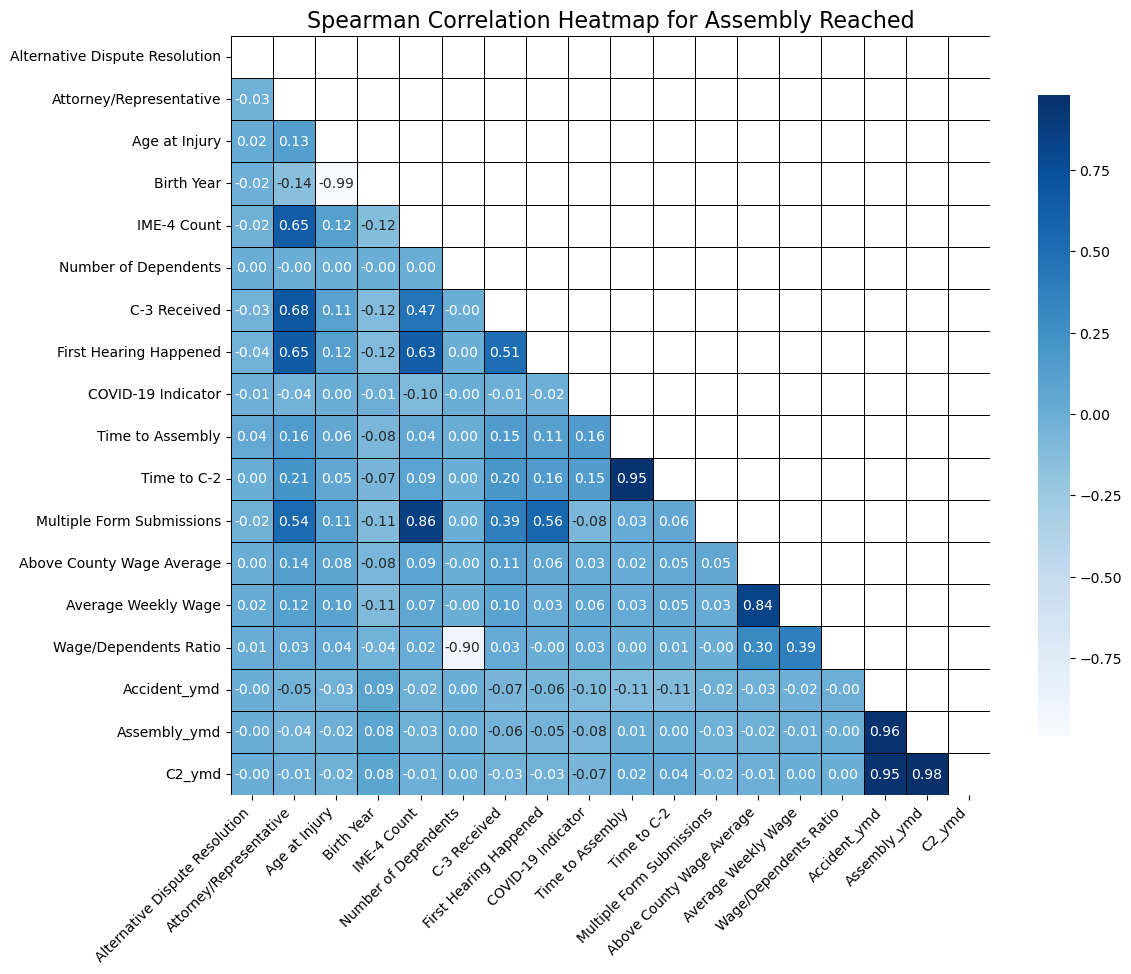

In [103]:
def cor_heatmap(cor, title='Correlation Heatmap', cmap='Reds'):
    mask = np.triu(np.ones_like(cor, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=cmap, fmt='.2f', 
                 mask=mask, linewidths=0.5, linecolor='black', square=True,
                 cbar_kws={"shrink": .8})
    
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

cor_spearman_ar = X_train_ar[num_ar].corr(method='spearman')

cor_heatmap(cor_spearman_ar, title='Spearman Correlation Heatmap for Assembly Reached', cmap='Blues')

### RandomForestClassifier Feature Importances

In [105]:
model_ar = RandomForestClassifier(n_estimators=50, max_depth=9, min_samples_split=50, max_features=None, class_weight='balanced', random_state=15)
model_ar.fit(X_train_ar, y_train_ar)

importances_ar = model_ar.feature_importances_

feature_importance_df_ar = pd.DataFrame({'Feature': X_train_ar.columns, 'Importance': importances_ar})

feature_importance_df_ar = feature_importance_df_ar.sort_values(by='Importance', ascending=False)

print(feature_importance_df_ar)

                           Feature    Importance
2          Attorney/Representative  6.437006e-01
5                     Carrier Name  2.053165e-01
11                     IME-4 Count  2.561268e-02
17                        Zip Code  2.534121e-02
20          First Hearing Happened  1.378721e-02
27                    Accident_ymd  1.160619e-02
28                    Assembly_ymd  1.158103e-02
3              Average Weekly Wage  1.060739e-02
21              Injury Day of Week  9.443222e-03
23                     Time to C-2  9.021116e-03
12                   Industry Code  5.459885e-03
9                    District Name  3.996758e-03
29                          C2_ymd  2.974164e-03
22                Time to Assembly  2.605232e-03
14       WCIO Cause of Injury Code  2.060940e-03
7                 County of Injury  1.989201e-03
15      WCIO Nature of Injury Code  1.968155e-03
4                       Birth Year  1.962697e-03
19                    C-3 Received  1.825969e-03
16          WCIO Par

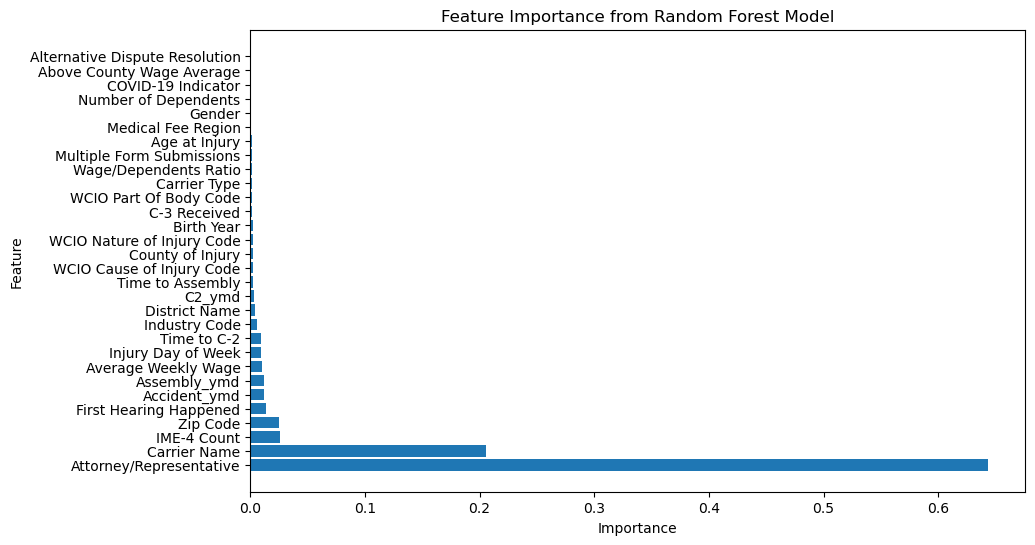

In [106]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_ar['Feature'], feature_importance_df_ar['Importance'])
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In this case, we will set a threshold where any feature with importance greater than 0.5% is considered relevant. 

### Mutual Information

In [109]:
mi_scores = mutual_info_classif(X_train_ar, y_train_ar)

mi_df = pd.DataFrame({'Feature': X_train_ar.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Mutual Information Scores:\n", mi_df)

Mutual Information Scores:
                            Feature  MI Score
0          Attorney/Representative  0.061900
1                           Gender  0.053879
2        Above County Wage Average  0.053132
3               Medical Fee Region  0.050281
4                     Carrier Type  0.049206
5           First Hearing Happened  0.040955
6                     C-3 Received  0.040006
7                    District Name  0.033159
8                      IME-4 Count  0.024746
9                     Carrier Name  0.024223
10       Multiple Form Submissions  0.024087
11      WCIO Nature of Injury Code  0.022722
12             Average Weekly Wage  0.019703
13           Wage/Dependents Ratio  0.015075
14                   Industry Code  0.013165
15            Number of Dependents  0.012553
16                        Zip Code  0.010681
17          WCIO Part Of Body Code  0.009661
18                County of Injury  0.007961
19       WCIO Cause of Injury Code  0.007942
20                    Accid

For Mutual Information, we will keep the 2% thresold.

### Lasso Regression

In [112]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5)

reg.fit(X_train_ar, y_train_ar)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5)

In [113]:
coef = pd.Series(reg.coef_, index=X_train_ar.columns)
coef

Age at Injury                    -0.328755
Alternative Dispute Resolution    0.000000
Attorney/Representative           0.091153
Average Weekly Wage              -0.084907
Birth Year                       -0.351040
Carrier Name                      0.452740
Carrier Type                      0.012942
County of Injury                 -0.035148
COVID-19 Indicator                0.000000
District Name                     0.013628
Gender                            0.000000
IME-4 Count                       0.065212
Industry Code                     0.017729
Medical Fee Region               -0.015277
WCIO Cause of Injury Code        -0.009380
WCIO Nature of Injury Code        0.004330
WCIO Part Of Body Code            0.036150
Zip Code                          0.567070
Number of Dependents             -0.000000
C-3 Received                     -0.012344
First Hearing Happened            0.030367
Injury Day of Week                0.018378
Time to Assembly                  0.007742
Time to C-2

In [114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 9 variables


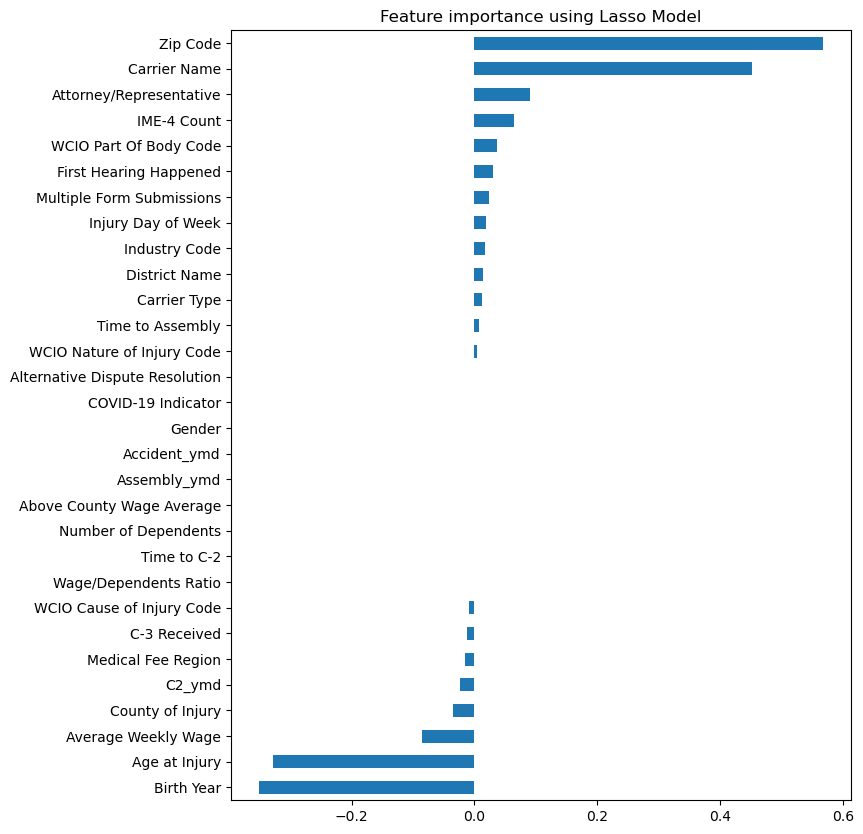

In [115]:
plot_importance(coef,'Lasso')

### Conclusions

Applying a voting system, and taking into account the 0.05% threshold for RandomForestClassifier Feature Importances and the 2% for Mutual Information, we get to the following conclusions:

| Predictor | Spearman  | RandomForestClassifier Feature Importance | Mutual Information | LASSO Regression | What to do? (One possible way to "solve") |
|---|---|---|---|---|---|
| Age at Injury | High correlated with Birth Year | Discard | Discard | Keep | Discard |
| Alternative Dispute Resolution | Keep | Discard | Discard | Discard | Discard |
| Attorney/Representative | Keep | Keep | Keep | Keep | Include in the model |
| Average Weekly Wage | High correlated with Above County Wage Average | Keep | Keep | Keep | Include in the model |
| Birth Year | High correlated with Birth Year | Discard | Discard | Keep | Discard |
| Carrier Name | NA | Keep | Keep | Keep | Include in the model |
| Carrier Type | NA | Discard | Keep | Keep | Include in the model |
| County of Injury | NA | Discard | Discard | Keep | Discard |
| COVID-19 Indicator | Keep | Discard | Discard | Discard | Discard |
| District Name | NA | Discard | Keep | Keep | Include in the model |
| Gender | NA | Discard | Keep | Discard | Discard |
| IME-4 Count | High correlated with Multiple Form Submissions | Keep | Keep | Keep | Include in the model |
| Industry Code | NA | Keep | Discard | Keep | Include in the model |
| Medical Fee Region | NA | Discard | Keep | Keep | Include in the model |
| WCIO Cause of Injury Code | NA | Discard | Discard | Keep | Discard |
| WCIO Nature of Injury Code | NA | Discard | Keep | Keep | Include in the model |
| WCIO Part Of Body Code | NA | Discard | Discard | Keep | Discard |
| Zip Code | NA | Keep | Discard | Keep | Include in the model |
| Number of Dependents | High correlated with Wage/Dependents Ratio | Discard | Discard | Discard | Discard |
| C-3 Received | Keep | Discard | Keep | Keep | Include in the model |
| First Hearing Happened | Keep | Keep | Keep | Keep | Include in the model |
| Injury Day of Week | NA | Keep | Discard | Keep | Include in the model |
| Time to Assembly | High correlated with Time to C-2 | Discard | Discard | Keep | Discard |
| Time to C-2 | High correlated with Time to Assembly | Keep | Discard | Discard | Discard |
| Wage/Dependents Ratio | High correlated with Number of Dependents| Discard | Discard | Discard | Discard |
| Multiple Form Submissions | High correlated with IME-4 Count | Discard | Keep | Keep | Discard (already kept IME-4 Count) |
| Above County Wage Average | High correlated with Average Weekly Wage | Discard | Keep | Discard | Discard (already kept Average Weekly Wage) |
| Accident_ymd | High correlated with Assembly_ymd and C2_ymd | Keep | Discard | Discard | Discard |
| Assembly_ymd | High correlated with Accident_ymd and C2_ymd | Keep | Discard | Keep | Discard |
| C2_ymd | High correlated with Accident_ymd and Assembly_ymd | Discard | Discard | Keep | Discard |

In [119]:
include_variables_ar = [
    "Attorney/Representative",
    "Average Weekly Wage",
    "Carrier Name",
    "Carrier Type",
    "District Name",
    "IME-4 Count",
    "Industry Code",
    "Medical Fee Region",
    "WCIO Nature of Injury Code",
    "Zip Code",
    "C-3 Received",
    "First Hearing Happened",
    "Injury Day of Week"
]

## Model Comparison and Selection

In [121]:
X_train_ar = X_train_ar[include_variables_ar]
X_val_ar = X_val_ar[include_variables_ar]

### RandomForestClassifier

In [123]:
results_rf_ar = validation_rf(X_train_ar, y_train_ar, X_val_ar, y_val_ar)

In [124]:
results_rf_ar

{'train_f1': 0.942343326565412,
 'val_f1': 0.9375279206351772,
 'elapsed_time': 65.79215550422668}

### HistGradientBoostingClassifier

In [126]:
results_hgb_ar = validation_hgb(X_train_ar, y_train_ar, X_val_ar, y_val_ar)

In [127]:
results_hgb_ar

{'train_f1': 0.9432617192174406,
 'val_f1': 0.9383191861523784,
 'elapsed_time': 2.4730050563812256}

### MLPClassifier

In [129]:
results_mlp_ar = validation_mlp(X_train_ar, y_train_ar, X_val_ar, y_val_ar)

In [130]:
results_mlp_ar

{'train_f1': 0.9416070860348523,
 'val_f1': 0.9371274166217131,
 'elapsed_time': 158.60150289535522}

### StackingClassifier

In [132]:
results_stack_ar = validation_stack(X_train_ar, y_train_ar, X_val_ar, y_val_ar)

In [133]:
results_stack_ar

{'train_f1': 0.944363320675721,
 'val_f1': 0.9391739062708989,
 'elapsed_time': 234.106440782547}

### Comparing Models

In [135]:
def create_summary_table_ar(results_rf_ar, results_hgb_ar, results_mlp_ar, results_stack_ar):
    results = []
    models = [
        ("Random Forest", results_rf_ar),
        ("Hist Gradient Boosting", results_hgb_ar),
        ("MLP Classifier", results_mlp_ar),
        ("Stacking Classifier", results_stack_ar)
    ]

    for model_name, model_results in models:
        train_f1 = model_results['train_f1']
        val_f1 = model_results['val_f1']
        elapsed_time = model_results['elapsed_time']
        
        results.append({
            "Model": model_name,
            "Train F1 Score": train_f1,
            "Validation F1 Score": val_f1,
            "Time Taken (s)": elapsed_time
        })
    
    summary_table = pd.DataFrame(results)
    
    return summary_table

summary_table_ar = create_summary_table_ar(results_rf_ar, results_hgb_ar, results_mlp_ar, results_stack_ar)
summary_table_ar

,Model,Train F1 Score,Validation F1 Score,Time Taken (s)
0,Random Forest,0.942343,0.937528,65.792156
1,Hist Gradient Boosting,0.943262,0.938319,2.473005
2,MLP Classifier,0.941607,0.937127,158.601503
3,Stacking Classifier,0.944363,0.939174,234.106441


All the models showed strong performance, with high F1 scores. The **StackingClassifier** slightly outperformed the others, achieving the best training and validation results. For that reason, we selected the **StackingClassifier** as our final model to predict the **'Agreement Reached'** column.

## Final Agreement Reached Model

In [138]:
rf_model = RandomForestClassifier(
        n_estimators=50, 
        max_depth=9, 
        min_samples_split=50, 
        random_state=15
    )
    
hgb_model = HistGradientBoostingClassifier(
        max_iter=2000, 
        max_depth=10, 
        random_state=15
    )
    
estimators = [
        ('rf', rf_model),
        ('hgbc', hgb_model)
    ]
    
final_estimator = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(X_train.shape[1] * 2, X_train.shape[1] * 2, X_train.shape[1] * 2),
        activation='relu',
        learning_rate_init=0.0025,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        tol=1e-6
    )
    
final_model_ar = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )


final_model_ar.fit(X_train_ar, y_train_ar)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=50,
                                                       n_estimators=50,
                                                       random_state=15)),
                               ('hgbc',
                                HistGradientBoostingClassifier(max_depth=10,
                                                               max_iter=2000,
                                                               random_state=15))],
                   final_estimator=MLPClassifier(early_stopping=True,
                                                 hidden_layer_sizes=(32, 32,
                                                                     32),
                                                 learning_rate_init=0.0025,
                                                 max_iter=1000,
                                                 n_iter_no_change=20,
                                                 random_state=42, tol=1e-06))

# Applying the Agreement Reached Model

In [140]:
X_test_ar = df_test_ar[include_variables_ar]  

predictions = final_model_ar.predict(X_test_ar)

df_test_enc_scal['Agreement Reached'] = predictions

# Applying the Claim Injury Type Model

In [142]:
df_test_model = df_test_enc_scal[include_variables]

In [143]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Attorney/Representative     387975 non-null  float64
 1   Average Weekly Wage         387975 non-null  float64
 2   Birth Year                  387975 non-null  float64
 3   Carrier Name                387975 non-null  float64
 4   Carrier Type                387975 non-null  float64
 5   IME-4 Count                 387975 non-null  float64
 6   Industry Code               387975 non-null  float64
 7   Medical Fee Region          387975 non-null  float64
 8   WCIO Cause of Injury Code   387975 non-null  float64
 9   WCIO Nature of Injury Code  387975 non-null  float64
 10  WCIO Part Of Body Code      387975 non-null  float64
 11  Zip Code                    387975 non-null  float64
 12  Agreement Reached           387975 non-null  int64  
 13  C-3 Received  

In [144]:
X_train_enc_scal[include_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450806 entries, 0 to 450805
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Attorney/Representative     450806 non-null  float64
 1   Average Weekly Wage         450806 non-null  float64
 2   Birth Year                  450806 non-null  float64
 3   Carrier Name                450806 non-null  float64
 4   Carrier Type                450806 non-null  float64
 5   IME-4 Count                 450806 non-null  float64
 6   Industry Code               450806 non-null  float64
 7   Medical Fee Region          450806 non-null  float64
 8   WCIO Cause of Injury Code   450806 non-null  float64
 9   WCIO Nature of Injury Code  450806 non-null  float64
 10  WCIO Part Of Body Code      450806 non-null  float64
 11  Zip Code                    450806 non-null  float64
 12  Agreement Reached           450806 non-null  float64
 13  C-3 Received  

In [145]:
df_test_model['Agreement Reached'] = df_test_model['Agreement Reached'].astype('float64')

In [146]:
encoded_predictions = final_model.predict(df_test_model)

In [147]:
label_path = 'label_encoder.pkl'
label_encoder = joblib.load(label_path)

In [148]:
df_test_enc_scal['Claim_Injury_Type'] = label_encoder.inverse_transform(encoded_predictions)

In [149]:
df_test_enc_scal['Claim_Injury_Type'].head()

0    2. NON-COMP
1    2. NON-COMP
2    2. NON-COMP
3    2. NON-COMP
4    2. NON-COMP
Name: Claim_Injury_Type, dtype: object

In [150]:
df_test_enc_scal['Claim_Injury_Type'].value_counts()

Claim_Injury_Type
2. NON-COMP        317702
4. TEMPORARY        47975
5. PPD SCH LOSS     11815
3. MED ONLY          5580
1. CANCELLED         4859
8. DEATH               44
Name: count, dtype: int64

In [151]:
df_test_indexes = pd.read_csv('df_test_indexes.csv')

In [152]:
df_test_indexes.head()

,Unnamed: 0,Claim Identifier
0,0,6165911
1,1,6166141
2,2,6165907
3,3,6166047
4,4,6166102


In [153]:
df_test_indexes = df_test_indexes['Claim Identifier']

In [154]:
submission_df = pd.DataFrame({
    'Claim Identifier': df_test_indexes,  
    'Claim Injury Type': df_test_enc_scal['Claim_Injury_Type']
})

submission_df.to_csv('submission.csv', index=False)

In [155]:
joblib.dump(final_model, 'final_model.pkl')
print("Model saved as 'final_model.pkl'")

Model saved as 'final_model.pkl'
